In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [83]:
orig_df = pd.read_csv("../Resources/telecom_customer_churn.csv")
orig_df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [84]:
orig_df.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [85]:
mylist = list(orig_df.select_dtypes(exclude=['object']).columns)
print(mylist)

kmean_df = orig_df[mylist]
kmean_df.head()

['Age', 'Number of Dependents', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']


,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,37,0,93225,34.827662,-118.999073,2,9,42.39,16.0,65.6,593.30,0.00,0,381.51,974.81
1,46,0,91206,34.162515,-118.203869,0,9,10.69,10.0,-4.0,542.40,38.33,10,96.21,610.28
2,50,0,92627,33.645672,-117.922613,0,4,33.65,30.0,73.9,280.85,0.00,0,134.60,415.45
3,78,0,94553,38.014457,-122.115432,1,13,27.82,4.0,98.0,1237.85,0.00,0,361.66,1599.51
4,75,0,93010,34.227846,-119.079903,3,3,7.38,11.0,83.9,267.40,0.00,0,22.14,289.54


In [86]:
kmean_df.drop('Zip Code', axis=1, inplace=True)
kmean_df.drop('Latitude', axis=1, inplace=True)
kmean_df.drop('Longitude', axis=1, inplace=True)
kmean_df.drop('Total Charges', axis=1, inplace=True)



c:\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [87]:
print("Dataframe size: is",len(kmean_df))
kmean_df.dropna( axis=0, how='any', thresh=None, subset=None, inplace=True)
print("Dataframe size after drop is",len(kmean_df))

Dataframe size: is 7043
Dataframe size after drop is 4835


<ipython-input-87-a4d2ba6891b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kmean_df.dropna( axis=0, how='any', thresh=None, subset=None, inplace=True)


In [88]:
kmean_df.head()

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,37,0,2,9,42.39,16.0,65.6,0.00,0,381.51,974.81
1,46,0,0,9,10.69,10.0,-4.0,38.33,10,96.21,610.28
2,50,0,0,4,33.65,30.0,73.9,0.00,0,134.60,415.45
3,78,0,1,13,27.82,4.0,98.0,0.00,0,361.66,1599.51
4,75,0,3,3,7.38,11.0,83.9,0.00,0,22.14,289.54


In [89]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 

In [90]:
#Load Data
data = kmean_df
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(data)
 
df.shape

(4835, 2)

In [91]:
#2. Apply K-Means to the Data

#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 10)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
#kmeans.fit_predict method returns the array of cluster labels each data point belongs to. 

print(label)

[4 0 0 ... 7 0 9]


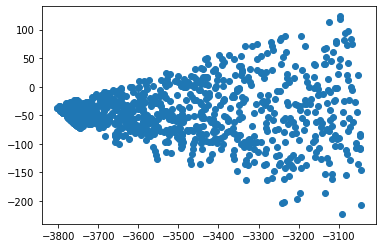

In [92]:
#3. Plotting Label 0 K-Means Clusters
#Let’s visualize cluster with label 0 using the matplotlib library.

import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label0 = df[label == 0]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

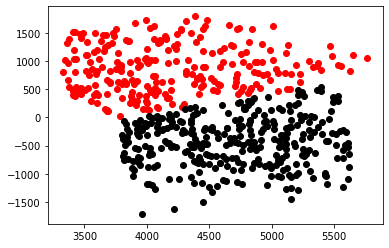

In [93]:
#4. Plotting Additional K-Means Clusters

#filter rows of original data
filtered_label2 = df[label == 2]
 
filtered_label8 = df[label == 8]
 
#Plotting the results
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'red')
plt.scatter(filtered_label8[:,0] , filtered_label8[:,1] , color = 'black')
plt.show()

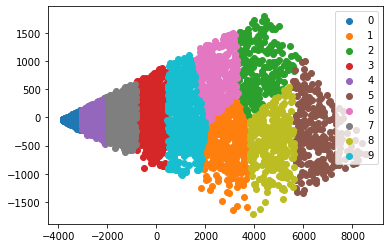

In [94]:
#5. Plot All K-Means Clusters

#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

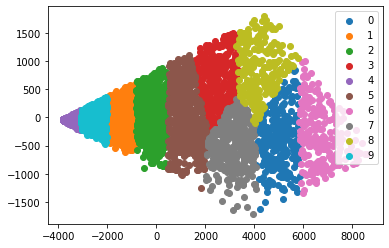

In [97]:
#Importing required modules
 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
#Load Data
data = kmean_df
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(data)
 
#Import KMeans module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 10)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()